In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from tqdm import tqdm

In [3]:
# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/통계데이터사이언스/lending_club/preprocessed_data_ver.2.1.csv')

In [5]:
# 모든 열 다 보기
pd.set_option('display.max_columns', None)

# 모든 행 다 보기
pd.set_option('display.max_rows', None)

# 열 너비 넉넉하게
pd.set_option('display.width', None)

# 열 안의 값 자르지 않게
pd.set_option('display.max_colwidth', None)

In [6]:
df.head()

,funded_amnt,term,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,last_pymnt_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,default,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,addr_state_nan,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,home_ownership_nan,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,purpose_nan,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,verification_status_nan,emp_length_missing,percent_bc_gt_75_missing,collection_recovery_fee_missing,annual_inc_missing,fico_range_low_missing,open_il_24m_missing,pub_rec_missing,mths_since_last_delinq_missing,total_bal_il_missing,acc_now_delinq_missing,all_util_missing,inq_last_6mths_missing,mths_since_recent_revol_delinq_missing,mths_since_recent_inq_missing,delinq_2yrs_missing,revol_bal_missing,total_acc_missing,open_rv_12m_missing,open_il_12m_missing,funded_amnt_missing,il_util_missing,inq_last_12m_missing,open_acc_6m_missing,open_rv_24m_missing,fico_range_high_missing,recoveries_missing,open_acc_missing,max_bal_bc_missing,last_fico_range_low_missing,mths_since_rcnt_il_missing,delinq_amnt_missing,last_fico_range_high_missing,installment_missing,open_act_il_missing
0,6000.0,36,187.94,2.0,45000.0,8.67,1.0,755.0,759.0,0.0,22.0,14.0,0.0,3090.0,14.0,36.0,0.00,0.000,Apr-2020,764.0,760.0,0.0,0.0,0.0,50054.0,1.0,10.0,3.0,3.0,3.0,46964.0,83.0,1.0,1.0,3090.0,64.0,22100.0,2.0,4.0,3850.0,11910.0,20.6,0.0,0.0,147.0,135.0,12.0,3.0,1.0,56.0,3.0,0.0,0.0,1.0,1.0,4.0,28.0,4.0,7.0,1.0,14.0,0.0,0.0,0.0,4.0,97.1,0.0,0.0,0.0,78611.0,50054.0,15000.0,56511.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23200.0,60,680.82,10.0,110000.0,34.70,1.0,670.0,674.0,1.0,10.0,24.0,0.0,16909.0,55.9,60.0,5260.00,946.800,Dec-2016,639.0,635.0,0.0,0.0,0.0,606327.0,1.0,10.0,1.0,2.0,10.0,277552.0,90.0,4.0,6.0,4698.0,85.0,30255.0,7.0,8.0,25264.0,6014.0,70.4,0.0,0.0,126.0,277.0,6.0,6.0,2.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from tqdm import tqdm
import numpy as np
import pandas as pd

drop_cols = [
    'term', 'last_pymnt_d', 'installment', 'funded_amnt',
    'recoveries', 'collection_recovery_fee', 'default'
]

X = df.drop(columns=drop_cols)
y = df['default']


# 반복 결과 저장
pred_dfs = []
auc_list, acc_list = [], []

# 반복 학습
for seed in tqdm(range(10), desc="Random Forest 10회 반복"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        stratify=y, random_state=seed)

    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=seed)
    model.fit(X_train, y_train)

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    auc_list.append(roc_auc_score(y_test, y_pred_prob))
    acc_list.append(accuracy_score(y_test, y_pred))

    pred_df = X_test.copy()
    pred_df['default'] = y_test.values
    pred_df['pred_prob'] = y_pred_prob
    pred_df['pred'] = y_pred
    pred_dfs.append(pred_df)

# 성능 요약 출력
print("\n예측 성능 요약")
print(f"AUC 평균: {np.mean(auc_list):.4f} ± {np.std(auc_list):.4f}")
print(f"ACC 평균: {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")


Random Forest 10회 반복: 100%|██████████| 10/10 [17:33<00:00, 105.39s/it]


예측 성능 요약
AUC 평균: 0.9354 ± 0.0005
ACC 평균: 0.8942 ± 0.0003


In [9]:
pred_all = pd.concat(pred_dfs, ignore_index=True)

In [10]:
!pip install fredapi

In [13]:
cols_needed = ['term', 'installment', 'funded_amnt', 'recoveries', 'collection_recovery_fee']
pred_all = pred_all.merge(df[cols_needed], left_index=True, right_index=True, how='left')

In [14]:
from fredapi import Fred

# 1. API 연결
def connect_fred_api():
    return Fred(api_key=os.getenv("FRED_API_KEY"))

# 2. 최신 금리값 불러오기
def get_latest_risk_free_rates():
    fred = connect_fred_api()
    rate_series_3y = fred.get_series('GS3')
    rate_series_5y = fred.get_series('GS5')

    rf_3y = rate_series_3y.dropna().iloc[-1] / 100
    rf_5y = rate_series_5y.dropna().iloc[-1] / 100
    return rf_3y, rf_5y

# 3. term 기준으로 적용
def apply_fixed_risk_free_rate(df):
    rf_3y, rf_5y = get_latest_risk_free_rates()
    df['risk_free_rate'] = df['term'].apply(lambda t: rf_3y if t == 36 else rf_5y if t == 60 else np.nan)
    return df

# 적용 (예측 결과 df에)
pred_all = apply_fixed_risk_free_rate(pred_all)


In [21]:
def create_cash_flow(row):
    try:
        # 현금흐름 계산 로직
        term = int(row['term'])
        installment = float(row['installment'])
        funded_amnt = float(row['funded_amnt'])
        recoveries = float(row.get('recoveries', 0))
        collection_fee = float(row.get('collection_recovery_fee', 0))

        cash_flow = [-funded_amnt] + [installment] * (term - 1) + [installment + recoveries - collection_fee]

        return cash_flow
    except Exception as e:
        # 오류 시 np.nan 반환 (float -> TypeError 방지)
        return np.nan



In [16]:
!pip install numpy-financial

In [22]:
import numpy_financial as npf
import numpy as np

def calculate_irr(cash_flow):
    if not isinstance(cash_flow, (list, np.ndarray)):
        return np.nan

    irr_monthly = npf.irr(cash_flow)
    if irr_monthly is not None and not np.isnan(irr_monthly):
        return (1 + irr_monthly) ** 12 - 1
    return np.nan


In [23]:
def calculate_sharpe(returns, risk_free):
    returns = np.asarray(returns, dtype=float)
    risk_free = np.asarray(risk_free, dtype=float)
    mask = ~np.isnan(returns) & ~np.isnan(risk_free)
    excess = returns[mask] - risk_free[mask]
    if excess.size == 0 or np.nanstd(excess, ddof=1) == 0:
        return np.nan
    return np.nanmean(excess) / np.nanstd(excess, ddof=1)


In [25]:
pred_all['cash_flow'] = pred_all.apply(create_cash_flow, axis=1)
pred_all['irr'] = pred_all['cash_flow'].apply(calculate_irr)


In [26]:
sharpe = calculate_sharpe(pred_all['irr'], pred_all['risk_free_rate'])
print(f"전체 Sharpe Ratio: {sharpe:.4f}")


전체 Sharpe Ratio: 1.8004


In [27]:
def compute_sharpe_for_threshold(df, threshold):
    selected = df[df['pred_prob'] <= threshold]
    return calculate_sharpe(selected['irr'], selected['risk_free_rate'])


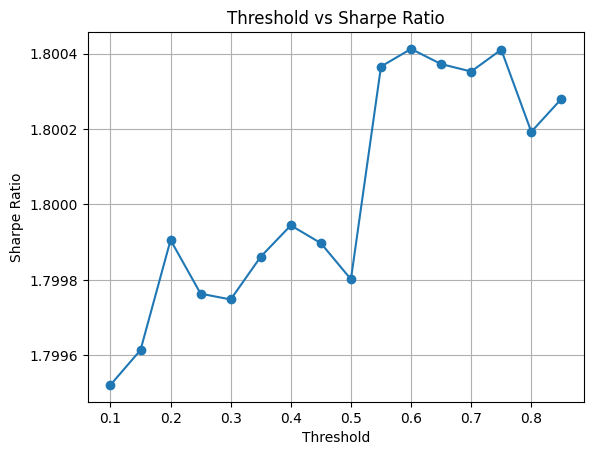

In [32]:
import matplotlib.pyplot as plt

thresholds = np.arange(0.1, 0.9, 0.05)
sharpe_list = [compute_sharpe_for_threshold(pred_all, th) for th in thresholds]

plt.plot(thresholds, sharpe_list, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Sharpe Ratio')
plt.title('Threshold vs Sharpe Ratio')
plt.ticklabel_format(useOffset=False)
plt.grid(True)
plt.show()


In [30]:
# threshold 값 리스트
thresholds = np.arange(0.1, 0.9, 0.05)

# threshold별 sharpe ratio 계산
sharpe_values = [compute_sharpe_for_threshold(pred_all, t) for t in thresholds]

# 가장 높은 Sharpe Ratio와 해당 threshold 찾기
max_idx = np.nanargmax(sharpe_values)
best_threshold = thresholds[max_idx]
best_sharpe = sharpe_values[max_idx]

print(f"최적 Threshold: {best_threshold:.2f}")
print(f"최대 Sharpe Ratio: {best_sharpe:.4f}")


최적 Threshold: 0.60
최대 Sharpe Ratio: 1.8004
